In [1]:
#unos potrebnih modula

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#unos podataka iz csv datoteke
train_df = pd.read_csv('nsl-kdd/KDDTrain+.txt')
test_df = pd.read_csv('nsl-kdd/KDDTest+.txt')

In [2]:
#prikazivanje strukture podataka unutar dataframea + prikaz broja redova i stupaca
#broj stupaca mora biti jednak da se mogu povezati u jedan dataframe

print(train_df, test_df)

        0  tcp  ftp_data   SF   491   0.1  0.2  0.3  0.4  0.5  ...  0.17  \
0       0  udp     other   SF   146     0    0    0    0    0  ...  0.00   
1       0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
2       0  tcp      http   SF   232  8153    0    0    0    0  ...  1.00   
3       0  tcp      http   SF   199   420    0    0    0    0  ...  1.00   
4       0  tcp   private  REJ     0     0    0    0    0    0  ...  0.07   
...    ..  ...       ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
125967  0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
125968  8  udp   private   SF   105   145    0    0    0    0  ...  0.96   
125969  0  tcp      smtp   SF  2231   384    0    0    0    0  ...  0.12   
125970  0  tcp    klogin   S0     0     0    0    0    0    0  ...  0.03   
125971  0  tcp  ftp_data   SF   151     0    0    0    0    0  ...  0.30   

        0.03  0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0       0.60 

In [3]:
#podaci u izvornom .csv obliku nemaju nazive stupaca pa ih treba rucno dodati

columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [4]:
#unos imena stupaca u oba dataframea

train_df.columns = columns
test_df.columns = columns

In [5]:
#buduci da su dvije unesene datoteke vec podijeljene u train i test setove, model ce uvijek prediktirati identicno
#te se podatke moze povezati i kasnije dijeliti s train_test_split metodom da model moze mijenjati train i test podatke
#povezuje se concat metodom, a s ignore_index=True ce nastaviti niz indeksa vrijednosti
#u slucaju da se ne stavi, indeksi train seta ce ici od 0 do n-1 i unosom test seta ce ici opet od 0 do n-1

df = pd.concat([train_df, test_df], ignore_index=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148511,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148513,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
#provjera da li ima "praznih" vrijednosti

df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
#prikaz nekih osnovnih parametara: indeks, stupac, broj non-null vrijednosti, broj uzoraka i tip podatka

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

In [8]:
#prikaz statistickih informacija o podacima: broj uzoraka, srednja vrijednost, standardna devijacija, najmanja vrijednost, itd.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148515.0,276.783032,2.460699e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148515.0,40228.487729,5.409648e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148515.0,17089.083722,3.703550e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148515.0,0.000215,1.467724e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148515.0,0.020523,2.400707e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148515.0,0.000202,1.941721e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148515.0,0.189382,2.013173e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148515.0,0.004323,7.224871e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148515.0,0.402794,4.904617e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148515.0,0.255065,2.223152e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [9]:
#provjera da li ima duplih indeksa za svaki slucaj

df[df.index.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level


In [10]:
#prikaz broja uzoraka svakog tipa napada u ciljnoj varijabli 'attack'

df['attack'].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


Text(0, 0.5, 'Vrsta napada')

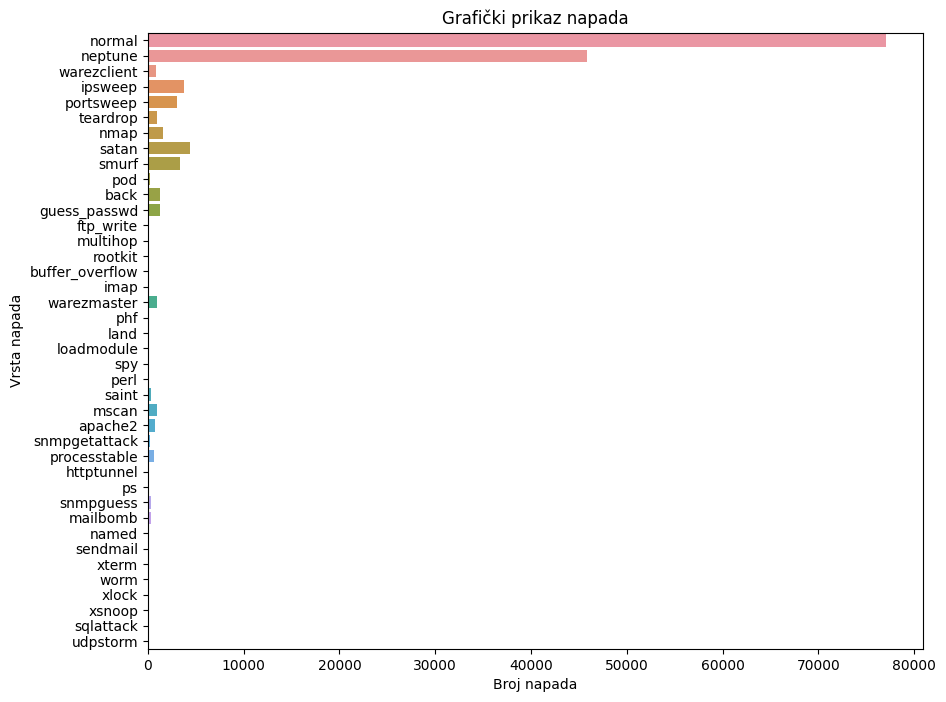

In [11]:
#seaborn knjizica je izgradjena na pyplot knjizici i njom se moze koristiti vec gotove grafove, samo se unesu vrijednost

plt.figure(figsize=(10, 8))
attack_dist = sns.countplot(data=df, y='attack')
plt.title('Grafički prikaz napada')
plt.xlabel('Broj napada')
plt.ylabel('Vrsta napada')

In [12]:
#protocol_type stupac je jedan od kandidata za graficki prikaz napada
#spajanjem podataka unutar crosstab objekta se moze jednostavno pripremiti za prikaz napada po protokolima

attacks_per_protocol = pd.crosstab(df.attack, df.protocol_type)
attacks_per_protocol

protocol_type,icmp,tcp,udp
attack,,,
apache2,0,737,0
back,0,1315,0
buffer_overflow,0,50,0
ftp_write,0,11,0
guess_passwd,0,1284,0
httptunnel,0,133,0
imap,0,12,0
ipsweep,3258,482,0
land,0,25,0


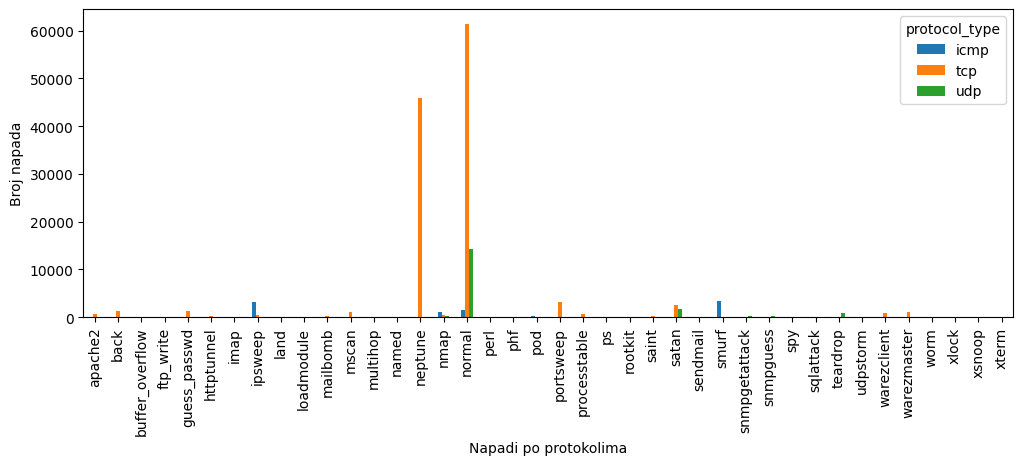

In [13]:
#graficki prikaz gore ispisanog crosstaba

app = attacks_per_protocol.plot(kind='bar', figsize=(12, 4), xlabel="Napadi po protokolima", ylabel="Broj napada")

In [14]:
#kopiranje 'attack' stupca

df['attack_classes'] = df.loc[:, 'attack']
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148511,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,back
148513,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [15]:
#unutar novog stupca ce se grupirati napade prema dokumentaciji autora dataseta
#na prethodnom grafu napada vrijednosti nisu previse vidljive zbog ogromne razlike u frekvencijama

def attack_label(dataframe):
  dataframe.attack_classes.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'DoS', inplace=True)
  dataframe.attack_classes.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L', inplace=True)      
  dataframe.attack_classes.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'probe', inplace=True)
  dataframe.attack_classes.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R', inplace=True)
    
attack_label(df)
df['attack_classes']

0         normal
1            DoS
2         normal
3         normal
4            DoS
           ...  
148510    normal
148511    normal
148512       DoS
148513    normal
148514     probe
Name: attack_classes, Length: 148515, dtype: object

In [16]:
#na identican nacin se izradjuje crosstab

attacks_per_protocol2 = pd.crosstab(df.attack_classes, df.protocol_type)
attacks_per_protocol2

protocol_type,icmp,tcp,udp
attack_classes,,,
DoS,3553,48927,906
R2L,4,3362,514
U2R,0,116,3
normal,1402,61441,14210
probe,4375,7721,1981


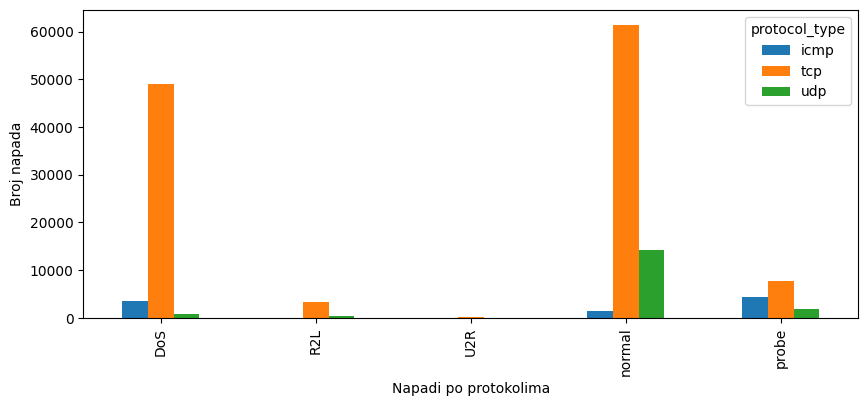

In [17]:
app2 = attacks_per_protocol2.plot(kind='bar', figsize=(10, 4), xlabel="Napadi po protokolima", ylabel="Broj napada")

In [18]:
#grafički prikaz napada po individualnim protokolima
icmp_att = attacks_per_protocol2.icmp
tcp_att = attacks_per_protocol2.tcp
udp_att = attacks_per_protocol2.udp

#unos ^ u polje za prikaz 'pie' grafova kroz 'for' petlju

pies = [icmp_att, tcp_att, udp_att]

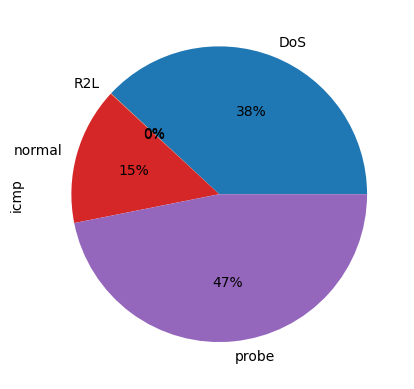

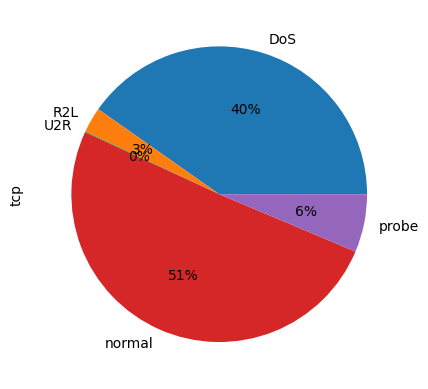

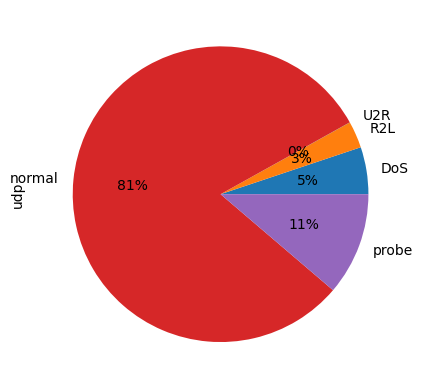

In [19]:
#for petlja i graficki prikazi s postotcima

for p in pies:
    p.plot.pie(autopct='%.0f%%')
    plt.show()

Text(0, 0.5, 'Broj napada')

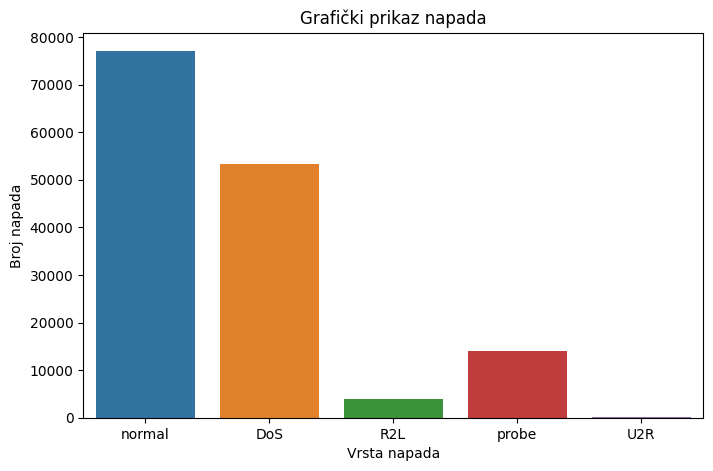

In [20]:
#također može se prikazati bar plot s kategorijama napada

plt.figure(figsize=(8, 5))
attack_dist2 = sns.countplot(data=df, x='attack_classes')
plt.title('Grafički prikaz napada')
plt.xlabel('Vrsta napada')
plt.ylabel('Broj napada')

In [21]:
#kraj analize

In [22]:
#početak modeliranja
#stupce čiji podaci nisu numeričkog tipa će se dekodirati pomoću dummies
#alternativni nacin je kodiranje vrijednosti pomocu label encoder objekta u vrijednosti 1 - n

from sklearn.preprocessing import LabelEncoder

to_encode = ['protocol_type', 'service', 'flag']

le = LabelEncoder()

df[to_encode] = df[to_encode].apply(LabelEncoder().fit_transform)

#encode = pd.get_dummies(df[to_encode], dtype=int)
#df = df.join(encode)
#for i in to_encode:
#    df.drop(i, axis=1, inplace=True)
    
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
2,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,1,54,9,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148511,0,1,24,9,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148512,0,1,24,9,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,DoS
148513,0,2,12,9,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [23]:
#grupirani napadi vise ne trebaju pa ih se izbacuje
#izvorni stupac s napadim se pretvara u binarne vrijednosti 1-napad i 0-lazni napad

#kopiranje trenutnog df-a za viseklasnu predikciju
df2 = df.copy()

attack_flag = df.attack.map(lambda a: 0 if a == 'normal' else 1)
df['attack_flag'] = attack_flag
df.drop(['attack_classes', 'attack'], axis=1, inplace=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,1,54,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,21,0
148511,0,1,24,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,21,0
148512,0,1,24,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,15,1
148513,0,2,12,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,21,0


In [24]:
#koristit ce se sljedeci algoritmi: Naive Bayes, Knn i decision tree

In [25]:
#također testirat ce se na 2 seta podataka:
# 1. podaci s korelacijom 0.5 i vise s ciljnom varijablom 'attack flag'
# 2. podaci s korelacijom izmedju 0.3 i 0.6 s ^
df1 = df.copy()

In [26]:
#prikaz matrice korelacije

df.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
duration,1.000000,0.032642,0.097320,-0.048305,0.068959,0.034056,-0.001651,-0.009616,0.002426,0.000664,...,-0.104633,0.223635,0.201275,-0.025950,-0.053811,-0.052307,0.143902,0.163311,-0.126979,0.052119
protocol_type,0.032642,1.000000,0.049475,0.096866,-0.000992,-0.000604,-0.001938,0.158072,-0.001373,-0.012419,...,0.008186,0.124318,-0.190566,-0.344225,-0.078622,-0.077207,-0.027709,-0.053706,0.024118,-0.271632
service,0.097320,0.049475,1.000000,-0.307945,-0.002055,0.003173,-0.011187,0.076064,0.015840,-0.065115,...,-0.444808,0.274432,-0.116954,-0.161066,0.257420,0.256551,0.185959,0.180159,-0.029967,0.299903
flag,-0.048305,0.096866,-0.307945,1.000000,-0.007054,-0.003574,-0.010390,0.062726,0.007633,0.065992,...,0.638224,-0.272877,0.204225,0.080388,-0.392776,-0.391250,-0.712049,-0.756076,0.013391,-0.629552
src_bytes,0.068959,-0.000992,-0.002055,-0.007054,1.000000,0.000212,-0.000109,-0.000633,-0.000074,0.000347,...,-0.006312,0.000730,0.000559,-0.001424,-0.004003,-0.002959,-0.001745,0.010495,-0.017770,0.005457
dst_bytes,0.034056,-0.000604,0.003173,-0.003574,0.000212,1.000000,-0.000068,-0.000394,0.000179,-0.000297,...,-0.004168,0.009834,0.010847,-0.001143,-0.002639,-0.002567,0.009986,0.009600,-0.013567,0.003583
land,-0.001651,-0.001938,-0.011187,-0.010390,-0.000109,-0.000068,1.000000,-0.001255,-0.000153,-0.001381,...,0.009425,-0.004612,0.032151,0.072119,0.020496,0.015019,-0.005983,-0.005972,-0.026944,0.008817
wrong_fragment,-0.009616,0.158072,0.076064,0.062726,-0.000633,-0.000394,-0.001255,1.000000,-0.000889,-0.008042,...,-0.046592,0.051988,0.040057,-0.009778,-0.045496,-0.049995,0.019285,-0.034777,-0.130583,0.081697
urgent,0.002426,-0.001373,0.015840,0.007633,-0.000074,0.000179,-0.000153,-0.000889,1.000000,0.008151,...,-0.003882,0.007248,0.002249,0.005386,-0.005676,-0.006068,-0.003789,-0.001098,-0.044597,0.003862
hot,0.000664,-0.012419,-0.065115,0.065992,0.000347,-0.000297,-0.001381,-0.008042,0.008151,1.000000,...,-0.036212,-0.009751,-0.033312,-0.022945,-0.053127,-0.053735,-0.031548,-0.034212,-0.130702,-0.009637


In [27]:
#u polje to_drop ce se unijeti stupci s korelacijom manjom od 0.4 i -0.4 s 'attack' stupcem
#da bi se utjecalo i na stupce s negativnom korelacijom, unutar kopije dataframea ce se korelacije postaviti na apsolutnu vrijednost

to_drop = []

dfc = df.copy()
for x in dfc:
    if abs(dfc[x].corr(dfc['attack_flag'])) < 0.4:
        to_drop.append(x)

#prikaz rezultata for petlje

to_drop

['duration',
 'protocol_type',
 'service',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'srv_count',
 'rerror_rate',
 'srv_rerror_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level']

In [28]:
#izbacivanje gore ispisanih stupaca 

df.drop(to_drop, axis=1, inplace=True)
df.corr()

,flag,logged_in,num_outbound_cmds,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_flag
flag,1.000000,0.569377,NaN,-0.467568,-0.401206,-0.396120,0.722524,0.585083,0.638224,-0.392776,-0.391250,-0.629552
logged_in,0.569377,1.000000,NaN,-0.530782,-0.466502,-0.464962,0.590631,0.618146,0.598825,-0.465815,-0.468539,-0.664124
num_outbound_cmds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,-0.467568,-0.530782,NaN,1.000000,0.410502,0.406669,-0.616397,-0.382077,-0.458139,0.413588,0.415763,0.524102
serror_rate,-0.401206,-0.466502,NaN,0.410502,1.000000,0.991507,-0.711260,-0.526429,-0.588133,0.974696,0.976030,0.588480
srv_serror_rate,-0.396120,-0.464962,NaN,0.406669,0.991507,1.000000,-0.707233,-0.523997,-0.585004,0.970802,0.981982,0.586642
same_srv_rate,0.722524,0.590631,NaN,-0.616397,-0.711260,-0.707233,1.000000,0.707823,0.791012,-0.714357,-0.718170,-0.708907
dst_host_srv_count,0.585083,0.618146,NaN,-0.382077,-0.526429,-0.523997,0.707823,1.000000,0.898247,-0.543460,-0.537753,-0.692585
dst_host_same_srv_rate,0.638224,0.598825,NaN,-0.458139,-0.588133,-0.585004,0.791012,0.898247,1.000000,-0.606718,-0.599095,-0.667630
dst_host_serror_rate,-0.392776,-0.465815,NaN,0.413588,0.974696,0.970802,-0.714357,-0.543460,-0.606718,1.000000,0.982812,0.589941


In [29]:
#num_outbound_cmds prikazuje Not-a-Number vrijednost korelacije
#najjednostavnije bi bilo izbaciti van

df.drop('num_outbound_cmds', axis=1, inplace=True)
df1.drop('num_outbound_cmds', axis=1, inplace=True)

In [30]:
#podjela na trening-test setove u omjeru 70 na trening i 30 na test
#u X ide ciljna varijabla
#u Y ide sve ostalo

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
#naive bayes

#poziv objekta algoritma
cnb = CategoricalNB()

#treniranje podataka
cnb.fit(X_train, y_train)

#testiranje
cnb_predict=cnb.predict(X_test)

#prikaz preciznosti i izvjestaja
print(accuracy_score(y_test, cnb_predict))
print(classification_report(y_test, cnb_predict))

0.8733251038042869
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     23193
           1       0.96      0.77      0.85     21362

    accuracy                           0.87     44555
   macro avg       0.89      0.87      0.87     44555
weighted avg       0.89      0.87      0.87     44555



<AxesSubplot:>

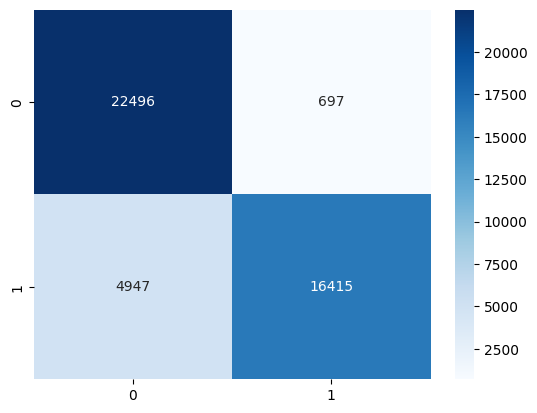

In [32]:
#prikaz preciznosti u obliku konfuzijske matrice uz pomoc seaborna

conf_matrix_cnb=confusion_matrix(y_test, cnb_predict)
sns.heatmap(conf_matrix_cnb, annot=True, cmap='Blues', fmt="d")

In [33]:
#dtc
#isti postupak ide i za iduce algoritme

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_predict=dtc.predict(X_test)
print(accuracy_score(y_test, dtc_predict))
print(classification_report(y_test, dtc_predict))

0.9458646616541353
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     23193
           1       0.95      0.93      0.94     21362

    accuracy                           0.95     44555
   macro avg       0.95      0.95      0.95     44555
weighted avg       0.95      0.95      0.95     44555



<AxesSubplot:>

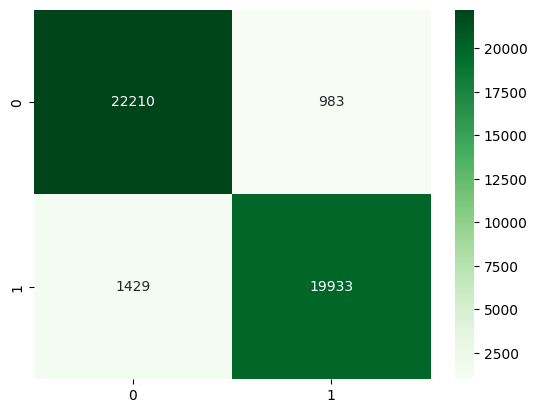

In [34]:
conf_matrix_dtc=confusion_matrix(y_test, dtc_predict)
sns.heatmap(conf_matrix_dtc, annot=True, cmap='Greens', fmt="d")

In [35]:
#knn
#racunanje k-vrijednosti prema nacelu k=sqrt(n)

n=int(math.sqrt(len(df)))

knn = KNeighborsClassifier(n_neighbors=n)

knn.fit(X_train, y_train)
knn_predict=knn.predict(X_test)
print(accuracy_score(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8888789137021659
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     23193
           1       0.97      0.80      0.87     21362

    accuracy                           0.89     44555
   macro avg       0.90      0.89      0.89     44555
weighted avg       0.90      0.89      0.89     44555



<AxesSubplot:>

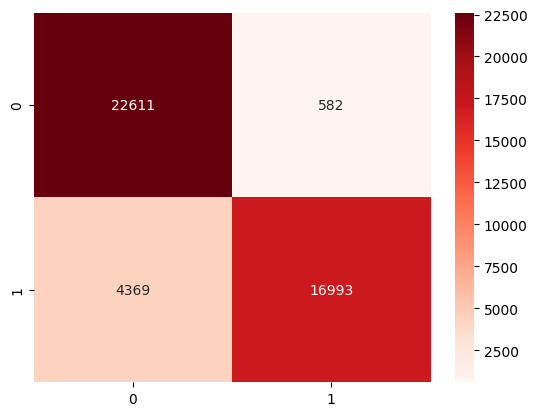

In [36]:
conf_matrix_knn=confusion_matrix(y_test, knn_predict)
sns.heatmap(conf_matrix_knn, annot=True, cmap='Reds', fmt="d")

In [37]:
#kraj prvog modela

In [38]:
#pocetak drugog modela
#za prvi model je koristen df dataframe, a za drugi se koristi df koji je kopija prvog prije svih promjena

df1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,1,54,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,21,0
148511,0,1,24,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,21,0
148512,0,1,24,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,15,1
148513,0,2,12,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,21,0


In [39]:
#testiranje s podacima s korelacijom izmedju 0.3 i 0.6 naspram ciljne varijable

In [40]:
#isti postupak izbacivanja stupaca kao u prvom modelu, samo su ciljne korelacije drukcije

to_drop = []

dfc1 = df1.copy()
for x in dfc1:
    if abs(dfc1[x].corr(dfc1['attack_flag'])) < 0.2:
        to_drop.append(x)
    elif abs(dfc1[x].corr(dfc1['attack_flag'])) > 0.55:
        to_drop.append(x)

#ciljna varijabla 'attack_flag' ce se naci u arrayu za izbacivanje jer ima korelaciju 1 sa sobom u matrici
#stoga ju treba izbaciti
#nalazi se na zadnjem mjestu u polju

to_drop = to_drop[:-1]        
to_drop

['duration',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate']

In [41]:
df1.drop(to_drop, axis=1, inplace=True)
df1.corr()

,protocol_type,service,count,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
protocol_type,1.000000,0.049475,-0.046058,-0.053578,-0.053492,0.030947,0.226783,0.124318,-0.027709,-0.053706,0.024118,-0.271632
service,0.049475,1.000000,0.107570,0.176664,0.174061,0.213620,0.207733,0.274432,0.185959,0.180159,-0.029967,0.299903
count,-0.046058,0.107570,1.000000,0.201788,0.202420,0.233640,0.446909,0.198273,0.221763,0.210376,0.023552,0.524102
rerror_rate,-0.053578,0.176664,0.201788,1.000000,0.986095,0.290208,0.109615,0.343824,0.916886,0.957356,-0.088732,0.300652
srv_rerror_rate,-0.053492,0.174061,0.202420,0.986095,1.000000,0.292335,0.110743,0.344914,0.906332,0.965605,-0.084175,0.299117
diff_srv_rate,0.030947,0.213620,0.233640,0.290208,0.292335,1.000000,0.177620,0.519573,0.250609,0.300272,-0.092886,0.215801
dst_host_count,0.226783,0.207733,0.446909,0.109615,0.110743,0.177620,1.000000,0.141052,0.116049,0.105799,0.000444,0.373455
dst_host_diff_srv_rate,0.124318,0.274432,0.198273,0.343824,0.344914,0.519573,0.141052,1.000000,0.390398,0.353639,-0.165877,0.244649
dst_host_rerror_rate,-0.027709,0.185959,0.221763,0.916886,0.906332,0.250609,0.116049,0.390398,1.000000,0.921346,-0.084358,0.300740
dst_host_srv_rerror_rate,-0.053706,0.180159,0.210376,0.957356,0.965605,0.300272,0.105799,0.353639,0.921346,1.000000,-0.070923,0.297965


In [42]:
#podjela podataka

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #random_state=42)

In [43]:
#naive bayes
cnb.fit(X_train, y_train)
cnb_predict=cnb.predict(X_test)
print(accuracy_score(y_test, cnb_predict))
print(classification_report(y_test, cnb_predict))

0.9253947412719254
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     15355
           1       0.93      0.91      0.92     14348

    accuracy                           0.93     29703
   macro avg       0.93      0.92      0.93     29703
weighted avg       0.93      0.93      0.93     29703



<AxesSubplot:>

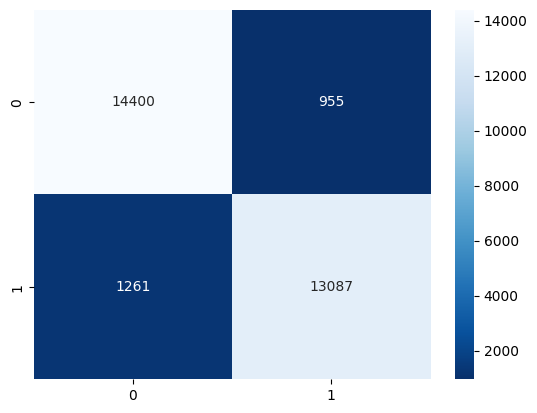

In [44]:
#konfuzijska matrica
conf_matrix_cnb=confusion_matrix(y_test, cnb_predict)
sns.heatmap(conf_matrix_cnb, annot=True, cmap='Blues_r', fmt="d")

In [45]:
# 2. stablo odlucivanja 
dtc.fit(X_train, y_train)
dtc_predict=dtc.predict(X_test)
print(accuracy_score(y_test, dtc_predict))
print(classification_report(y_test, dtc_predict))

0.9958253375079958
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15355
           1       1.00      1.00      1.00     14348

    accuracy                           1.00     29703
   macro avg       1.00      1.00      1.00     29703
weighted avg       1.00      1.00      1.00     29703



<AxesSubplot:>

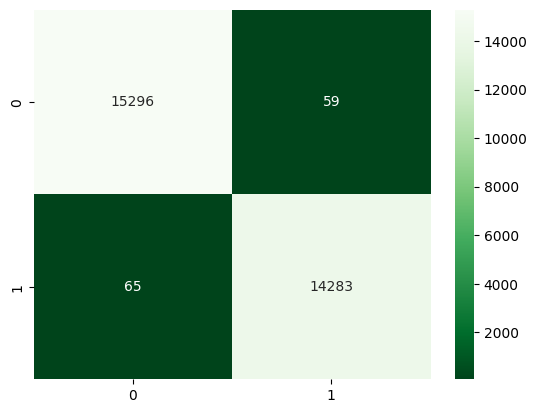

In [46]:
conf_matrix_dtc=confusion_matrix(y_test, dtc_predict)
sns.heatmap(conf_matrix_dtc, annot=True, cmap='Greens_r', fmt="d")

In [47]:
#knn
#prethodno je definirana vrijednost k kod prvog knn objekta

knn.fit(X_train, y_train)
knn_predict=knn.predict(X_test)
print(accuracy_score(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9218597448069219
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     15355
           1       0.94      0.89      0.92     14348

    accuracy                           0.92     29703
   macro avg       0.92      0.92      0.92     29703
weighted avg       0.92      0.92      0.92     29703



<AxesSubplot:>

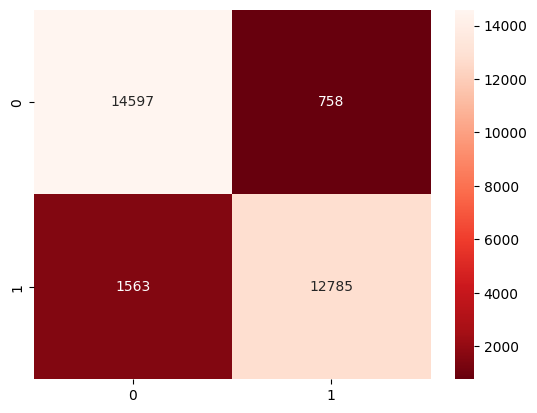

In [48]:
conf_matrix_knn=confusion_matrix(y_test, knn_predict)
sns.heatmap(conf_matrix_knn, annot=True, cmap='Reds_r', fmt="d")

In [49]:
#viseklasno

In [50]:
df2.drop('attack', axis=1, inplace=True)
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_classes
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,DoS
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,1,54,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,21,normal
148511,0,1,24,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,21,normal
148512,0,1,24,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,15,DoS
148513,0,2,12,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  int64  
 2   service                      148515 non-null  int64  
 3   flag                         148515 non-null  int64  
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

In [52]:
#df2 = df2.drop(columns[0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 41], axis = 1, inplace=True)

df2 = df2.drop(df2.columns[3:22], axis = 1)
df2 = df2.drop(['duration', 'level'], axis=1)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                148515 non-null  int64  
 1   service                      148515 non-null  int64  
 2   count                        148515 non-null  int64  
 3   srv_count                    148515 non-null  int64  
 4   serror_rate                  148515 non-null  float64
 5   srv_serror_rate              148515 non-null  float64
 6   rerror_rate                  148515 non-null  float64
 7   srv_rerror_rate              148515 non-null  float64
 8   same_srv_rate                148515 non-null  float64
 9   diff_srv_rate                148515 non-null  float64
 10  srv_diff_host_rate           148515 non-null  float64
 11  dst_host_count               148515 non-null  int64  
 12  dst_host_srv_count           148515 non-null  int64  
 13 

In [54]:
df2

,protocol_type,service,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_classes
0,2,44,13,1,0.0,0.0,0.0,0.0,0.08,0.15,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,1,49,123,6,1.0,1.0,0.0,0.0,0.05,0.07,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
2,1,24,5,5,0.2,0.2,0.0,0.0,1.00,0.00,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,1,24,30,32,0.0,0.0,0.0,0.0,1.00,0.00,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,1,49,121,19,0.0,0.0,1.0,1.0,0.16,0.06,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,1,54,1,1,0.0,0.0,0.0,0.0,1.00,0.00,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148511,1,24,2,11,0.0,0.0,0.0,0.0,1.00,0.00,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148512,1,24,5,10,0.0,0.0,0.0,0.0,1.00,0.00,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,DoS
148513,2,12,4,6,0.0,0.0,0.0,0.0,1.00,0.00,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [55]:
df2.corr()

,protocol_type,service,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
protocol_type,1.000000,0.049475,-0.046058,0.043607,-0.076005,-0.077927,-0.053578,-0.053492,0.039741,0.030947,...,0.226783,0.103030,0.008186,0.124318,-0.190566,-0.344225,-0.078622,-0.077207,-0.027709,-0.053706
service,0.049475,1.000000,0.107570,-0.233106,0.251197,0.248712,0.176664,0.174061,-0.362567,0.213620,...,0.207733,-0.395162,-0.444808,0.274432,-0.116954,-0.161066,0.257420,0.256551,0.185959,0.180159
count,-0.046058,0.107570,1.000000,0.491526,0.410502,0.406669,0.201788,0.202420,-0.616397,0.233640,...,0.446909,-0.382077,-0.458139,0.198273,-0.081219,-0.193475,0.413588,0.415763,0.221763,0.210376
srv_count,0.043607,-0.233106,0.491526,1.000000,-0.135281,-0.134571,-0.114487,-0.114368,0.185366,-0.107298,...,0.147699,0.208165,0.187861,-0.108734,0.210928,-0.058155,-0.134654,-0.133974,-0.105678,-0.114466
serror_rate,-0.076005,0.251197,0.410502,-0.135281,1.000000,0.991507,-0.228063,-0.225809,-0.711260,0.029605,...,0.357365,-0.526429,-0.588133,-0.008998,-0.250438,-0.155201,0.974696,0.976030,-0.225515,-0.220705
srv_serror_rate,-0.077927,0.248712,0.406669,-0.134571,0.991507,1.000000,-0.225687,-0.234654,-0.707233,0.026795,...,0.356159,-0.523997,-0.585004,-0.016562,-0.249801,-0.153774,0.970802,0.981982,-0.225891,-0.228287
rerror_rate,-0.053578,0.176664,0.201788,-0.114487,-0.228063,-0.225687,1.000000,0.986095,-0.273224,0.290208,...,0.109615,-0.284904,-0.303159,0.343824,-0.013027,0.006663,-0.227803,-0.224840,0.916886,0.957356
srv_rerror_rate,-0.053492,0.174061,0.202420,-0.114368,-0.225809,-0.234654,0.986095,1.000000,-0.272577,0.292335,...,0.110743,-0.283375,-0.300863,0.344914,-0.014171,0.004982,-0.225962,-0.232027,0.906332,0.965605
same_srv_rate,0.039741,-0.362567,-0.616397,0.185366,-0.711260,-0.707233,-0.273224,-0.272577,1.000000,-0.387697,...,-0.483823,0.707823,0.791012,-0.195609,0.255170,0.202728,-0.714357,-0.718170,-0.281453,-0.282381
diff_srv_rate,0.030947,0.213620,0.233640,-0.107298,0.029605,0.026795,0.290208,0.292335,-0.387697,1.000000,...,0.177620,-0.303992,-0.336423,0.519573,0.001417,-0.080258,0.029254,0.029041,0.250609,0.300272


In [56]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
cnb.fit(X_train, y_train)
cnb_predict=cnb.predict(X_test)
print(accuracy_score(y_test, cnb_predict))
print(classification_report(y_test, cnb_predict))

0.8791704541628792
              precision    recall  f1-score   support

         DoS       0.98      0.88      0.92     10664
         R2L       0.36      0.82      0.50       794
         U2R       0.00      0.00      0.00        26
      normal       0.92      0.89      0.90     15471
       probe       0.70      0.87      0.78      2748

    accuracy                           0.88     29703
   macro avg       0.59      0.69      0.62     29703
weighted avg       0.91      0.88      0.89     29703



In [58]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)
dtc_predict=dtc.predict(X_test)
print(accuracy_score(y_test, dtc_predict))
print(classification_report(y_test, dtc_predict))

0.9733360266639733
              precision    recall  f1-score   support

         DoS       0.99      0.99      0.99     10664
         R2L       0.81      0.61      0.70       794
         U2R       0.00      0.00      0.00        26
      normal       0.97      0.99      0.98     15471
       probe       0.98      0.96      0.97      2748

    accuracy                           0.97     29703
   macro avg       0.75      0.71      0.73     29703
weighted avg       0.97      0.97      0.97     29703



In [59]:
knn.fit(X_train, y_train)
knn_predict=knn.predict(X_test)
print(accuracy_score(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8953641046358953


/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         DoS       0.95      0.89      0.92     10664
         R2L       0.61      0.43      0.51       794
         U2R       0.00      0.00      0.00        26
      normal       0.88      0.97      0.92     15471
       probe       0.86      0.64      0.73      2748

    accuracy                           0.90     29703
   macro avg       0.66      0.59      0.62     29703
weighted avg       0.89      0.90      0.89     29703



/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
predictions = [ cnb_predict, dtc_predict, knn_predict ]

def conf_matrix(pred):
    conf_matrix=confusion_matrix(y_test, pred)
    sns.heatmap(conf_matrix_knn, annot=True, cmap="Greys", fmt="d")

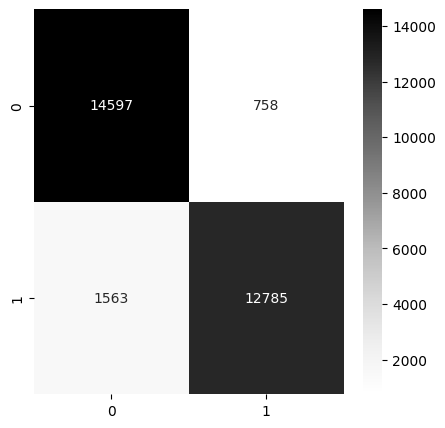

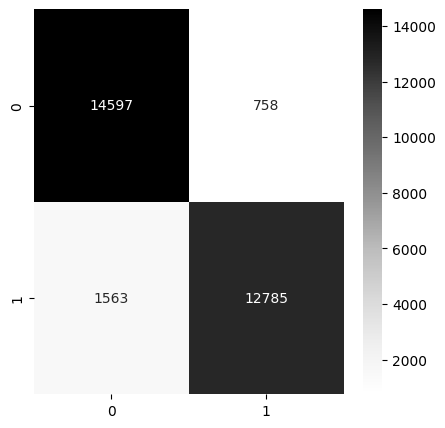

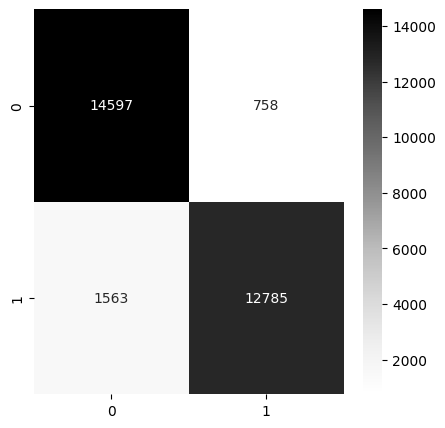

In [61]:
for p in predictions:
    plt.figure(figsize=(5, 5))
    conf_matrix(p)